<a href="https://colab.research.google.com/github/vijayinyoutube/CNN/blob/master/CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Intelligent Traffic Light Controller System** based on soft computing techniques

In [ ]:
#Description : Image processing using CNN for vehicle detection and signal optimization

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2MB 26kB/s 
     |████████████████████████████████| 3.0MB 45.2MB/s 
     |████████████████████████████████| 460kB 45.7MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
#Load the data
from keras.datasets import cifar10


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of x_train
print('x_train shape:', x_train.shape) #4D array 50,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_train shape:', y_train.shape) #2D array 50,000 rows and 1 column
#Get the shape of x_train
print('x_test shape:', x_test.shape) #4D array 10,000 rows 32x32 pixel image with depth = 3 visible wave lenghts (RGB)
#Get the shape of y_train
print('y_test shape:', y_test.shape) #2D array 10,000 rows and 1 column

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
print("Train samples:", x_train.shape)
print("Test samples:", x_test.shape)

Train samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


In [ ]:
#Take a look at the first image (at index=0) in the training data set as a numpy array
#This shows the image as a series of pixel values
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

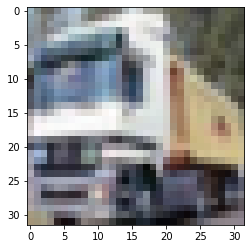

In [ ]:
#Show the image as an image instead of a series of pixel values using matplotlib
import matplotlib.pyplot as plt
img = plt.imshow(x_train[1])

In [ ]:
#Print the label of the image, NOTE: 
#1 = car
#9 = truck
print('The label is:', y_train[1])

The label is: [9]


In [ ]:


#One-Hot Encoding 
#Convert the labels into a set of 10 numbers to input into the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)



In [ ]:
#Print all of the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#normalize the pixels in the images to be a value between 0 and 1 , they are normally values between 0 and 255
#doing this will help the neural network.
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#Build The CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential() #Create the architecture

#Convolution layer to extract features from the input image, and create 32 ReLu
#5x5 convolved features/layers.
#Note: the input shape only in this first layer.
# number of output channels or convolution filters = 32
# number of rows in the convolution kernel
# number of cols in the convolution kernel
# input shape 32x32 RGB image, so spacially it's 3-Dimensional
# activation function Rectifier Linear Unit aka (ReLu)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 


#Pooling layer with a 2x2 filter to get the max element from the convolved features , 
#this reduces the dimensionality by half e.g. 16x16
#Note: the default for stride is the pool_size
model.add(MaxPooling2D(pool_size=(2, 2)))



#2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

#Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#this makes the image a linear array or 1D Array or 1D Vector to 
#feed into or connect with the neural network
model.add(Flatten())
model.add(Dense(1000, activation='relu')) # a layer with 1000 neurons and activation function ReLu
model.add(Dense(10, activation='softmax')) #a layer with 10 output neurons for each label using softmax activation function

In [ ]:
model.compile(loss='categorical_crossentropy', # for 10 classes, the target for each sample should be a 10-dimensional vector
              optimizer='adam', #The parameters clipnorm and clipvalue (focuses on adaptive learning [a 4th generation learning algm])
              metrics=['acc'])#List of metrics to be evaluated by the model during training and testing. 

In [ ]:
#Batch: Total number of training examples present in a single batch that is used for detecting error gradient
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and 
#      backward through the neural network only ONCE.

#into a validation sets. We just put in 0.3 and this splits the data 30% for us.
#hist is the history log of loss / accuracy for ploting graphs
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=10, validation_split=0.3 )

Epoch 1/10
137/137 [==============================] - 67s 487ms/step - loss: 1.6642 - acc: 0.3945 - val_loss: 1.4097 - val_acc: 0.4962
Epoch 2/10
137/137 [==============================] - 68s 494ms/step - loss: 1.2811 - acc: 0.5413 - val_loss: 1.2566 - val_acc: 0.5507
Epoch 3/10
137/137 [==============================] - 67s 487ms/step - loss: 1.1258 - acc: 0.6043 - val_loss: 1.1196 - val_acc: 0.6074
Epoch 4/10
137/137 [==============================] - 67s 489ms/step - loss: 1.0003 - acc: 0.6488 - val_loss: 1.0616 - val_acc: 0.6230
Epoch 5/10
137/137 [==============================] - 67s 486ms/step - loss: 0.9140 - acc: 0.6815 - val_loss: 0.9843 - val_acc: 0.6570
Epoch 6/10
137/137 [==============================] - 67s 488ms/step - loss: 0.8158 - acc: 0.7166 - val_loss: 1.0263 - val_acc: 0.6445
Epoch 7/10
137/137 [==============================] - 67s 488ms/step - loss: 0.7384 - acc: 0.7441 - val_loss: 0.9560 - val_acc: 0.6710
Epoch 8/10
137/137 [==============================] - 6

In [ ]:
#Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]
#test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 9s 29ms/step - loss: 0.9616 - acc: 0.6836


0.6836000084877014

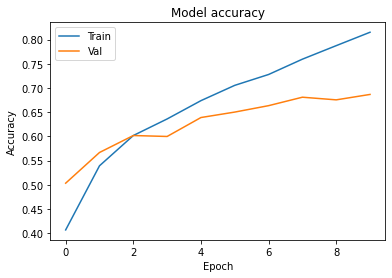

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

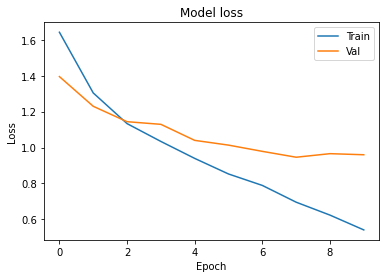

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [ ]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
my_image = plt.imread("carimage.jpg") #Read in the image (3, 14, 20)

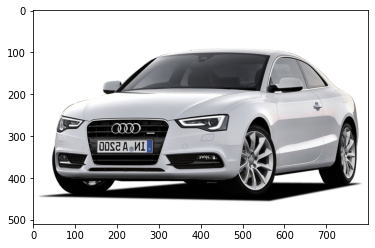

In [ ]:


#Show the uploaded image
img = plt.imshow(my_image)



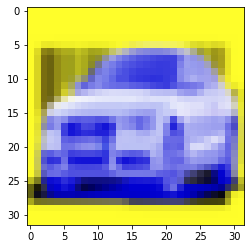

In [ ]:
#Resize & Show the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image

In [ ]:
#Get the probabilities for each class
#model.predict function is expecting an array, so we will use np.array to make this transformation on the image
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [ ]:
#Show the probability for each class
probabilities

array([[2.21355094e-06, 9.96166468e-01, 2.04466048e-07, 3.52167291e-08,
        2.65095606e-12, 3.64856277e-07, 8.49323214e-07, 1.54565818e-08,
        1.16246866e-07, 3.82976490e-03]], dtype=float32)

In [ ]:
number_to_class = ['van', 'car', 'bike', 'motorcycle', 'car', 'truck', 'bus', 'minivan', 'cycle', 'vehicle']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])

Most likely class: car -- Probability: 0.99616647
Second most likely class: vehicle -- Probability: 0.003829765


In [ ]:
#To save this model 
model.save('yolo.h5')

In [ ]:
#To load this model
from keras.models import load_model
model = load_model('yolo.h5')

**Yolo Algorithm for vehicle detection**

In [ ]:
!pip install tensorflow==1.13.1

  Using cached tensorflow-1.13.1-cp36-cp36m-manylinux1_x86_64.whl (92.5 MB)
  Using cached tensorboard-1.13.1-py3-none-any.whl (3.2 MB)
  Using cached tensorflow_estimator-1.13.0-py2.py3-none-any.whl (367 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
pip install keras==2.2.4

In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

hello = tf.constant('Hello, TensorFlow!')

sess = tf.compat.v1.Session()

print(sess.run(hello))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

b'Hello, TensorFlow!'


In [ ]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()
def forFrame(frame_number, output_array, output_count):
  global cars
  #global truck
  #global bus
  global total
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)

  print("Output count for unique objects : ", output_count)
 
  cars= output_count["car"]
  #truck = output_count["truck"]
  #bus = output_count["bus"]
  total=cars#+truck+bus
  print("------------END OF A FRAME --------------")


video_detector = VideoObjectDetection() #library->imageai Class->Detection method->VideoObjectDetection
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolo.h5"))
video_detector.loadModel()

custom_objects = video_detector.CustomObjects(truck=True, bicycle=True, motorcycle=True,bus=True,car=True)

video_path=video_detector.detectCustomObjectsFromVideo(input_file_path=os.path.join(execution_path, "car_video_Trim.mp4"), output_file_path=os.path.join(execution_path, "carimage2_processed") ,  frames_per_second=10, per_frame_function=forFrame,  minimum_percentage_probability=30)
print(video_path)

print("cars detected  :",cars)
#print("truck detected :",truck)
#print("bus detected   :",bus)
print("Total vehicles detected:",total)
from imageai.Detection import VideoObjectDetection
import os
execution_path = os.getcwd()
def forFrame(frame_number, output_array, output_count):
  global cars1
  global truck1
  global bus1
  global total1
  print("FOR FRAME " , frame_number)
  print("Output for each object : ", output_array)

  print("Output count for unique objects : ", output_count)
 
  cars1= output_count["car"]
  #truck1 = output_count["truck"]
  #bus1 = output_count["bus"]
  total1=cars1#+truck+bus
  print("------------END OF A FRAME --------------")


video_detector = VideoObjectDetection()
video_detector.setModelTypeAsYOLOv3()
video_detector.setModelPath(os.path.join(execution_path, "yolo.h5"))
video_detector.loadModel()

custom_objects = video_detector.CustomObjects(truck=True, bicycle=True, motorcycle=True,bus=True,car=True)

video_path=video_detector.detectCustomObjectsFromVideo(input_file_path=os.path.join(execution_path, "fourcarimage.jpg"), output_file_path=os.path.join(execution_path, "fourcarimage_processed") ,  frames_per_second=20, per_frame_function=forFrame,  minimum_percentage_probability=30)
print(video_path)

print("cars detected  :",cars1)
#print("truck detected :",truck1)
#print("bus detected   :",bus1)
print("Total vehicles detected:",total1)

print("-------------------------------------------")
print("total vehicles detected in camera-1:",total)
print("total vehicles detected in camera-2:",total1)
print("-------------------------------------------")

FOR FRAME  1
Output for each object :  [{'name': 'car', 'percentage_probability': 51.835089921951294, 'box_points': [1888, 256, 1916, 282]}, {'name': 'car', 'percentage_probability': 89.76982831954956, 'box_points': [764, 646, 903, 749]}, {'name': 'car', 'percentage_probability': 89.94643092155457, 'box_points': [994, 501, 1090, 575]}, {'name': 'car', 'percentage_probability': 94.02298331260681, 'box_points': [1217, 662, 1344, 774]}, {'name': 'car', 'percentage_probability': 94.53400373458862, 'box_points': [1395, 347, 1457, 399]}, {'name': 'car', 'percentage_probability': 95.97211480140686, 'box_points': [1329, 509, 1420, 596]}, {'name': 'car', 'percentage_probability': 96.34231328964233, 'box_points': [1007, 623, 1124, 734]}, {'name': 'car', 'percentage_probability': 96.48085832595825, 'box_points': [1267, 387, 1350, 447]}]
Output count for unique objects :  {'car': 8}
------------END OF A FRAME --------------
FOR FRAME  2
Output for each object :  [{'name': 'car', 'percentage_probab

In [ ]:
f= open("vehiclecount.txt","w+")
f.write("%d\n" % total)
f.write("%d" % total1)
f.close()

In [ ]:
os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = "carimage2_processed.avi", output ="carimage3_output"))
os.popen("ffmpeg -i '{input}' -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 '{output}.mp4'".format(input = "fourcarimage_processed.avi", output ="fourcarimage_output"))

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('carimage3_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('fourcarimage_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:

	
import cv2
 
# Opens the Video file
cap= cv2.VideoCapture('carimage3_output.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('carimage4.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


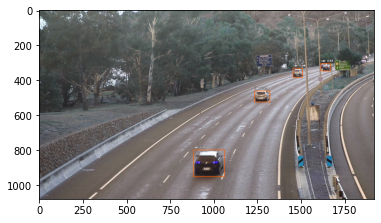

In [ ]:
import matplotlib.pyplot as plt
my_image = plt.imread("carimage4.jpg") 
img = plt.imshow(my_image)



In [ ]:
import cv2
 
# Opens the Video file
cap= cv2.VideoCapture('fourcarimage_output.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('fourcarimage4.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


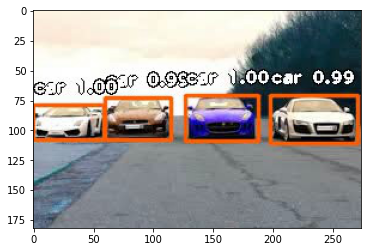

In [ ]:
my_image = plt.imread("fourcarimage4.jpg") 
img = plt.imshow(my_image)


In [ ]:
from IPython.display import display, HTML
# create a string template for the HTML snippet
link_t = "<p id='demo'>{count}</p>"

# create HTML object, using the string template
html = HTML(link_t.format(count=10))
# display the HTML object to put the link on the page:
display(html)

In [ ]:
print(total)
print(total1)

4
4


In [ ]:
# total=0
# total1=0
from IPython.display import display, HTML
import IPython
from google.colab import output
link_t = ('''<head>
    
    <!--<title> Intelligent Traffic Light Controller </title>-->
    <style>
html{{
	background: linear-gradient(#08f,#fff);
	width: 0.0000015%;
	height: 100%;
}}

.header
{{
  position:absolute;
	left:370px;
	color:black;
	font-family: verdana;
}}

.container
{{
	position:absolute;
	top:100px;
	left:100px;
	border: 2px solid black;
	width:400px;
	height:200px;	
	text-align:center;
}}

.container1
{{
	position:absolute;
	top:100px;
	left:750px;
	border: 2px solid black;
	width:400px;
	height:200px;	
	text-align:center;
}}

.innerDiv 
{{
	width:400px; 
	height:160px;
}}

.innerDiv1 
{{
	width:400px; 
	height:160px;
}}

#l1
{{
	position:absolute;
	top:70px;
  left:260px;
	text-align:center;
	color:black;
}}

#l2
{{
	position:absolute;
	top:320px;
	left:250px;
	color:black;
	font-weight:bold;
}}

#l3
{{
	position:absolute;
	top:70px;
  left:920px;
	text-align:center;
	color:black;
}}

#l4
{{
	position:absolute;
	top:320px;
	left:910px;
	color:black;
	font-weight:bold;
}}

#image1
{{
	width:400px;
	height: 160px;
}}

#image2
{{
	width:400px;
	height: 160px;
}}

#countdown
{{
	position:absolute;
	top:400px;
	left:620px;
	font-weight:bold;
	font-size:40px;
}}

#start
{{
	position:absolute;
	top:460px;
	left:580px;
	width:100px;
}}

#optimize
{{
	position:absolute;
	top:500px;
	left:580px;
	width:100px;
}}

#trafficsignal {{
    background: #111;
    background-image: linear-gradient(transparent 3%,#111 30%);
    width: 70px;
    height: 160px;
    border-radius: 20px;
    position: relative;
	  top:370px;
	  left:250px;
    border: 5px solid #333;
}}

#trafficsignal1 {{
    background: #111;
    background-image: linear-gradient(transparent 3%,#111 30%);
    width: 70px;
    height: 160px;
    border-radius: 20px;
    position: relative;
	  top:200px;
	  left:910px;
    border: 5px solid #333;
}}

#protector {{
    background: transparent;
    width: 80px;
    height: 0px;
    position: absolute;
    top: 10px;
    left: -35px;
    border-right: 30px solid transparent;
    border-left: 30px solid transparent;
    border-top: 90px solid #111;
    border-radius: 10px;
    z-index: -1;
}}

#protector1 {{
    background: transparent;
    width: 80px;
    height: 0px;
    position: absolute;
    top: 10px;
    left: -35px;
    border-right: 30px solid transparent;
    border-left: 30px solid transparent;
    border-top: 90px solid #111;
    border-radius: 10px;
    z-index: -1;
}}

#lRed {{
    background: red;
    background-image: radial-gradient(brown,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 8px;
    left: 15px;
    border:2px dotted red;
    box-shadow:inset 0 0 20px #111,0 0 10px red;
    //animation: red 15s infinite;
}}

#rRed {{
    background: red;
    background-image: radial-gradient(brown,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 8px;
    left: 15px;
    border:2px dotted red;
    box-shadow:inset 0 0 20px #111,0 0 10px red;
    //animation: red 15s infinite;
}}

#lYellow {{
    background: yellow;
    background-image: radial-gradient(orange,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 59px;
    left: 15px;
    border:2px dotted yellow;
    box-shadow:inset 0 0 20px #111,0 0 10px yellow;
    //animation: yellow 15s infinite;
}}

#rYellow {{
    background: yellow;
    background-image: radial-gradient(orange,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 59px;
    left: 15px;
    border:2px dotted yellow;
    box-shadow:inset 0 0 20px #111,0 0 10px yellow;
    //animation: yellow 15s infinite;
}}

#lGreen {{
    background: green;
    background-image: radial-gradient(lime,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 110px;
    left: 15px;
    border:2px dotted green;
    box-shadow:inset 0 0 20px #111,0 0 10px green;
    //animation: green 15s infinite;
}}

#rGreen {{
    background: green;
    background-image: radial-gradient(lime,transparent);
    background-size: 5px 5px;
    width: 40px;
    height: 40px;
    border-radius: 100%;
    position: absolute;
    top: 110px;
    left: 15px;
    border:2px dotted green;
    box-shadow:inset 0 0 20px #111,0 0 10px green;
    //animation: green 15s infinite;
}}

#count1
{{
  position:absolute;
  top:140px;
  left:530px;
  font-weight:bold;
}}

#count2
{{
  position:absolute;
  top:250px;
  left:580px;
  font-weight:bold;
}}
  
#directionLeft
{{
  position:absolute;
  top:450px;
  left:70px;
  font-size:20px;
  font-weight:bold;
}}

#directionRight
{{
  position:absolute;
  top:450px;
  left:1080px;
  font-size:20px;
  font-weight:bold;
}}

#left
{{
  position:absolute;
  top:170px;
  left:590px;
  width:50px;
}}

#right
{{
  position:absolute;
  top:280px;
  left:630px;
  width:50px;
}}
    </style>
     
</head>


<body>

  <h1 class="header"> Intelligent Traffic Light Controller </h1>
	
  <label id="l1"> Camera - 1 </label>

	<div class="container">

    <br>
	
		<input type="file"  accept="video/*" name="image" id="file"  onchange="loadImage1(event)" style="display: none;">
		
		<div class="innerDiv"> <video id="video1" width="400" height="165" autoplay muted> <source type="video/mp4" > </video> </div> <br> <br>
		
	</div>
	
	<label id="l2" for="file" style="cursor: pointer; border 1px solid white;"> Upload Video </label>

  <label id="l3"> Camera - 2 </label>
	
	<div class="container1">
		
		<br> 
	
		<input type="file"  accept="video/*" name="image" id="file1"  onchange="loadImage2(event)" style="display: none;">
		
		<div class="innerDiv1"> <video id="video2" width="400" height="165" autoplay muted> <source type="video/mp4" > </video> </div> <br> <br>
		
	</div>
	
	<label id="l4" for="file1" style="cursor: pointer; border 1px solid white;"> Upload Video </label>

	<button id="start" onclick="startNorm()"> Start </button>

  <button id="right" onclick="changeLeft()"> Right </button>

  <button id="left" onclick="changeRight()"> Left </button>

	<label id="countdown"> 0 </label>
	
	<div id="trafficsignal">

            <div id="protector"></div>
            <div id="protector"></div>
            <div id="protector"></div>

            <div id="leftRed"></div>
               
            <div id="leftYellow"></div>

            <div id="leftGreen"></div>
 
  </div>
	
	<div id="trafficsignal1">

            <div id="protector1"></div>
            <div id="protector1"></div>
            <div id="protector1"></div>

            <div id="rightRed"></div>

            <div id="rightYellow"></div>

            <div id="rightGreen"></div>

  </div>

  <p></p>

  <label id="count1"> < < < Traffic Density : <label id="p2"> {camera_1_count} </label></label>
  <label id="count2"> Traffic Density : <label id="p1"> {camera_2_count} </label> > > > </label>

  <label id="directionLeft"> L E F T </label>
  <label id="directionRight"> R I G H T </label>

	<script>
		
    var timeleft;
    var displayTime;
    var leftCount={camera_1_count};;
    var rightCount={camera_2_count};;

    var flag=0;
    var flag1=0;
    var flag2=0;

    function changeLeft()
    {{
        leftCount++;
        document.getElementById("p1").innerHTML=leftCount;
    }}

    function changeRight()
    {{
        rightCount++;
        document.getElementById("p2").innerHTML=rightCount;
    }}

    function startNorm()
    {{
        timeleft = 9;
        displayTime=9;

			  var downloadTimer = setInterval(function()
        {{

				    document.getElementById("countdown").innerHTML = displayTime;
				    timeleft -= 1;
            displayTime-=1;

                  if(timeleft == -1)
                  {{
                      if(document.getElementById("lYellow") && document.getElementById("rYellow"))
                      {{
                          document.getElementById("lYellow").setAttribute('id','leftYellow');
                          document.getElementById("rYellow").setAttribute('id','rightYellow');
                      }}

                      if(document.getElementById("lGreen") && document.getElementById("rRed"))
                      {{
                          document.getElementById("lGreen").setAttribute('id','leftGreen');
                          document.getElementById("rRed").setAttribute('id','rightRed');
                      }}

                      timeleft=59;                      
                      displayTime=19;
                      document.getElementById("leftRed").setAttribute('id','lRed');
                      document.getElementById("rightGreen").setAttribute('id','rGreen');
                      if(timeleft==40)
                      {{
                          flag=0;
                          flag1=0;
                          flag2=0;
                      }}
                  }}

                  else if(timeleft == 39)
                  {{

                      if(document.getElementById("lRed") && document.getElementById("rGreen"))
                      {{
                          document.getElementById("lRed").setAttribute('id','leftRed');
                          document.getElementById("rGreen").setAttribute('id','rightGreen');
                      }}

                      if(document.getElementById("lGreen") && document.getElementById("rRed"))
                      {{
                          document.getElementById("lGreen").setAttribute('id','leftGreen');
                          document.getElementById("rRed").setAttribute('id','rightRed');
                      }}

                      displayTime=9;
                      document.getElementById("leftYellow").setAttribute('id','lYellow');
                      document.getElementById("rightYellow").setAttribute('id','rYellow');
                      if(timeleft==30)
                      {{
                          flag=0;
                          flag1=0;
                          flag2=0;
                      }}
                  }}

                  else if(timeleft == 29)
                  {{
                      if(document.getElementById("lYellow") && document.getElementById("rYellow"))
                      {{
                          document.getElementById("lYellow").setAttribute('id','leftYellow');
                          document.getElementById("rYellow").setAttribute('id','rightYellow');
                      }}

                      if(document.getElementById("lRed") && document.getElementById("rGreen"))
                      {{
                          document.getElementById("lRed").setAttribute('id','leftRed');
                          document.getElementById("rGreen").setAttribute('id','rightGreen');
                      }}

                      displayTime=19;
                      document.getElementById("leftGreen").setAttribute('id','lGreen');
                      document.getElementById("rightRed").setAttribute('id','rRed');
                      if(timeleft==20)
                      {{
                          flag=0;
                          flag1=0;
                          flag2=0;
                      }}
                  }}

                  else if(timeleft == 9)
                  {{

                      if(document.getElementById("lRed") && document.getElementById("rGreen"))
                      {{
                          document.getElementById("lRed").setAttribute('id','leftRed');
                          document.getElementById("rGreen").setAttribute('id','rightGreen');
                      }}

                      if(document.getElementById("lGreen") && document.getElementById("rRed"))
                      {{
                          document.getElementById("lGreen").setAttribute('id','leftGreen');
                          document.getElementById("rRed").setAttribute('id','rightRed');
                      }}

                      displayTime=9;
                      document.getElementById("leftYellow").setAttribute('id','lYellow');
                      document.getElementById("rightYellow").setAttribute('id','rYellow');

                      if(timeleft==0)
                      {{
                          flag=0;
                          flag1=0;
                          flag2=0;
                      }}
                  }}


                  if(leftCount==0&&rightCount>0&&displayTime==0)
                  {{
                      timeleft=30;
                  }}
                  
                  if(rightCount==0&&leftCount>0&&displayTime==0)
                  {{
                      timeleft=0;
                  }}

                  if(leftCount==0&&rightCount==0&&displayTime==0)
                  {{
                      timeleft=40;
                  }}

                  if((rightCount>0)&&(leftCount>0)&&((2*leftCount)<rightCount)&&flag==0)
                  {{
                      timeleft=30;
                      flag=1;
                  }}

                  if((leftCount>0)&&(rightCount>0)&&((2*rightCount)<leftCount)&&flag1==0)
                  {{
                      timeleft=0;
                      flag1=1;
                  }}

        }}, 1000);
    }}

		var loadImage1 = function(event) 
		{{
			var video = document.getElementById('video1');
			video.src = URL.createObjectURL(event.target.files[0]);
		}};
		
		var loadImage2 = function(event) 
		{{
			var video = document.getElementById('video2');
			video.src = URL.createObjectURL(event.target.files[0]);
		}};
		
		
	</script>
  
</body>

  ''')
# create a string template for the HTML snippet


# create HTML object, using the string template
html = HTML(link_t.format(camera_1_count=total,camera_2_count=total1))
# display the HTML object to put the link on the page:
display(html)